        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Fall 2020</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [1]:
pip install --upgrade tensorflow


The following command must be run outside of the IPython shell:

    $ pip install --upgrade tensorflow

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


You can also check the version of it using the following code.

In [2]:
import tensorflow as tf
tf.__version__

'1.13.1'

Now, it's time to load the dataset

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
y_train.shape

(60000,)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

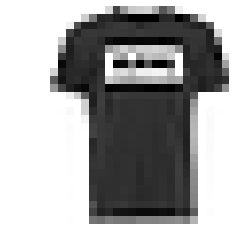

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[1]])

T-shirt/top


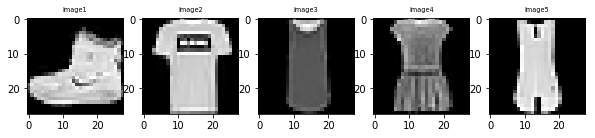

In [7]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

<b>Reshaping the raw data

In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

<h1>Normalize the data</h1>

<b>Normalizaing the data using the standard technique 

In [8]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Visualising data after normalizing

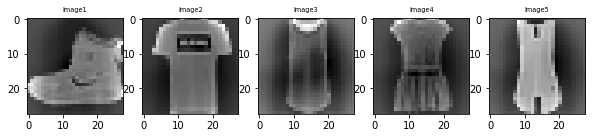

In [9]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

<h1>SVM</h1>

<b><p>SVM or Support Vector Machine is a linear model for classification and regression problems.<br/> The idea of SVM is: The algorithm creates a line or a hyperplane which separates the data into classes</p>
<p>While we can consider each pixel as a feature, it is much more managable if we first reduce the dimension. Hence we are doing dimension reduction here.</p>

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_svc = svc.predict(X_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print(metrics.classification_report(y_test, y_pred_svc))



-----------------SVM Report---------------
F1 score: 0.8365588730182096
Accuracy score: 0.8371
Confusion matrix: 
 [[816   5  11  52   4   1 105   0   6   0]
 [  7 962   5  20   2   0   2   0   2   0]
 [ 32   6 754   8 107   0  88   0   5   0]
 [ 48  23  25 833  27   0  41   0   2   1]
 [  1   3 117  40 763   0  71   0   5   0]
 [  0   0   0   0   0 922   0  42   2  34]
 [169   2 119  35 103   0 558   0  14   0]
 [  0   0   0   0   0  40   0 932   1  27]
 [ 17   2  14  11   7  18  32   4 895   0]
 [  0   0   0   0   0  25   1  38   0 936]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.72      0.75      0.74      1000
           3       0.83      0.83      0.83      1000
           4       0.75      0.76      0.76      1000
           5       0.92      0.92      0.92      1000
           6       0.62      0.56      0.59      1000
           7       0.

<h1>KNN

<p>KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function).
Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors</p>
<p>Here first we need to find out the number of neighbours to be chosen for the classification model. Hence we find the best possible model by training all the models with neighbours from 5-8 and choosing the best one based on accuracy score.</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [15]:
y_pred_knn

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [17]:
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)


print(metrics.classification_report(y_test, y_pred_knn))

-----------------K-nearest neighbors Report---------------
F1 score: 0.8535019726952562
Accuracy score: 0.8536
Confusion matrix: 
 [[862   0  14  18   9   0  92   0   5   0]
 [  8 968   3  12   5   0   4   0   0   0]
 [ 26   1 799  10  89   0  75   0   0   0]
 [ 46   5  14 862  38   0  34   0   1   0]
 [  1   0 111  28 771   0  87   0   2   0]
 [  1   0   0   2   0 842   5  84   3  63]
 [181   2 123  24  80   0 586   1   3   0]
 [  0   0   0   0   0   2   0 955   0  43]
 [  6   0  16   3   9   2  21  12 927   4]
 [  0   0   0   0   0   2   1  33   0 964]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.80      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.77      0.77      0.77      1000
           5       0.99      0.84      0.91      1000
           6       0.65      0.59      0.62      1000
     

<h1>Random Forest

<p>A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting</p>

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70)
param_grid = {'n_estimators': [50,100,150]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid_random = GridSearchCV(random_forest, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid_random.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [15]:
print("Best Parameter: {}".format(grid_random.best_params_))
print("Best Cross Vlidation Score: {}".format(grid_random.best_score_))

Best Parameter: {'n_estimators': 150}
Best Cross Vlidation Score: 0.8838


In [21]:
y_pred_forest = grid_random.predict(X_test)
random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)


print(metrics.classification_report(y_test, y_pred_forest))

-----------------Random Forest Report---------------
F1 score: 0.8749486742718967
Accuracy score: 0.8766
Confusion matrix: 
 [[864   1  12  26   4   1  80   0  12   0]
 [  3 964   3  21   4   0   4   0   1   0]
 [ 13   0 792   8 125   0  58   0   4   0]
 [ 20   2  11 912  31   0  21   0   3   0]
 [  1   0  89  35 821   0  52   0   2   0]
 [  0   0   0   0   0 957   0  31   1  11]
 [159   2 122  30  84   0 582   0  21   0]
 [  0   0   0   0   0   9   0 954   0  37]
 [  0   2   4   2   5   2   5   4 974   2]
 [  0   0   0   0   0   7   0  44   3 946]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.88      0.91      0.90      1000
           4       0.76      0.82      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.58      0.65      1000
           

<h1>Decision Tree

<p>Decision Trees are a non-parametric supervised learning method used for classification <br/>A tree can be "learned" by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node has all the same value of the target variable, or when splitting no longer adds value to the predictions. This process of top-down induction of decision trees is an example of a greedy algorithm, and it is the most common strategy for learning decision trees</p>

In [25]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(criterion='entropy')
param_grid = {'max_depth': [100,150,200,250]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid_tree = GridSearchCV(tree, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid_tree.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [100, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [27]:
print("Best Parameter: {}".format(grid_tree.best_params_))
print("Best Cross Vlidation Score: {}".format(grid_tree.best_score_))

Best Parameter: {'max_depth': 150}
Best Cross Vlidation Score: 0.8039333333333334


In [29]:
y_pred_tree = grid_tree.predict(X_test)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_test, y_pred_tree)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)

print(metrics.classification_report(y_test, y_pred_tree))

-----------------Decision Tree Report---------------
F1 score: 0.8016551045073356
Accuracy score: 0.8011
Confusion matrix: 
 [[742   4  24  46  12   2 157   0  12   1]
 [ 10 948   2  28   3   0   7   0   2   0]
 [ 20   0 678  20 142   0 129   0  10   1]
 [ 43  32  19 779  62   0  55   0   8   2]
 [ 11   2 165  39 669   0 108   0   5   1]
 [  2   1   2   1   0 900   2  57   7  28]
 [141   8 119  35 106   2 566   0  23   0]
 [  0   0   0   0   0  55   0 890   7  48]
 [  4   4  12   3   7   9  18  12 926   5]
 [  0   0   0   1   0  19   0  62   5 913]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.66      0.68      0.67      1000
           3       0.82      0.78      0.80      1000
           4       0.67      0.67      0.67      1000
           5       0.91      0.90      0.91      1000
           6       0.54      0.57      0.55      1000
           

In [15]:
y_pred_tree

array([9, 2, 1, ..., 8, 1, 7], dtype=uint8)

<h1>Neural Networks

<p>A neural network is a collection of neurons that take input and, in conjunction with information from other nodes, develop model without programmed rules</p>

In [137]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = MLPClassifier(solver='lbfgs',random_state=0)
param_grid = {'hidden_layer_sizes': [2,3,4]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [147]:
print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'hidden_layer_sizes': 4}
Best Cross Vlidation Score: 0.8128333333333333


In [24]:
from sklearn.metrics import accuracy_score

y_test_hat = grid.predict(X_test)
print(metrics.classification_report(y_test, y_test_hat))
accuracy_score(y_test,y_test_hat, normalize = True) * 100

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1000
           1       0.91      0.96      0.94      1000
           2       0.71      0.60      0.65      1000
           3       0.81      0.82      0.82      1000
           4       0.64      0.78      0.71      1000
           5       0.91      0.91      0.91      1000
           6       0.56      0.48      0.52      1000
           7       0.90      0.92      0.91      1000
           8       0.95      0.91      0.93      1000
           9       0.94      0.93      0.94      1000

   micro avg       0.81      0.81      0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



81.0

In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

gNB = GaussianNB()
gNB.fit(X_train,y_train)
nb_predict = gNB.predict(test_binary)



<h1>GRAPH

<BarContainer object of 5 artists>

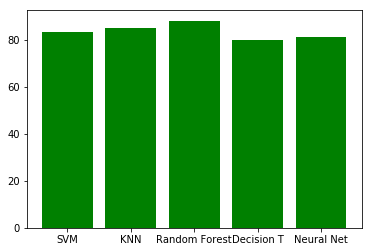

In [214]:
import matplotlib.pyplot as plt

plu = [83,85,88,80,81]
x_pos = ["SVM", "KNN","Random Forest", "Decision T","Neural Net"]

plt.bar(x_pos, plu, color='green')

<b>From the above graph we can come to a conclusion that Random forest is the best model and we will use it for Task 2 

<h1>Task 2

In [196]:
#read image
from PIL import Image
import numpy as np
import os
from skimage.io import imread


add = "Images/"

images = os.listdir('Images')
x = np.array([read_image(add,i) for i in images])


In [197]:
x.shape

(5, 28, 28)

In [179]:
from PIL import Image, ImageOps
import numpy as np
def read_image(base_path,img):
    path = base_path + '\\' + img
    img = Image.open(path).resize((28,28))
    img = np.array(ImageOps.grayscale(img)) 
    return img

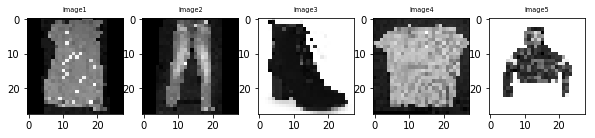

In [199]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,10))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(x[i], cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [201]:
x = x.reshape(5,784)

In [202]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [215]:

y_pred_forest = grid_random.predict(x)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print("The class names for the above images are:")
for i in y_pred_forest:
    print(class_names[i])


The class names for the above images are:
Coat
Dress
Ankle boot
Shirt
Bag


In [218]:
from sklearn.metrics import accuracy_score

y_image = [3,1,9,6,2]
accuracy = accuracy_score(y_image,y_pred_forest, normalize = True) * 100
print("The accurarcy of the model for the images is :",accuracy)

The accurarcy of the model for the images is : 40.0


#### Due Date: Nov 9 2020 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>